This notebook is for a Test Data Analytics project on Flowers

In [1]:
#Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
from sklearn import linear_model 
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X = iris.data
Y = iris.target

In [8]:
iris_data = DataFrame(X,columns=['SL','SW','PL','PW'])

In [9]:
iris_target = DataFrame(Y,columns=["Species"])

In [10]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [12]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Verginica'

In [13]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [14]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [29]:
iris = pd.concat([iris_data,iris_target], axis=1)

In [30]:
iris.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


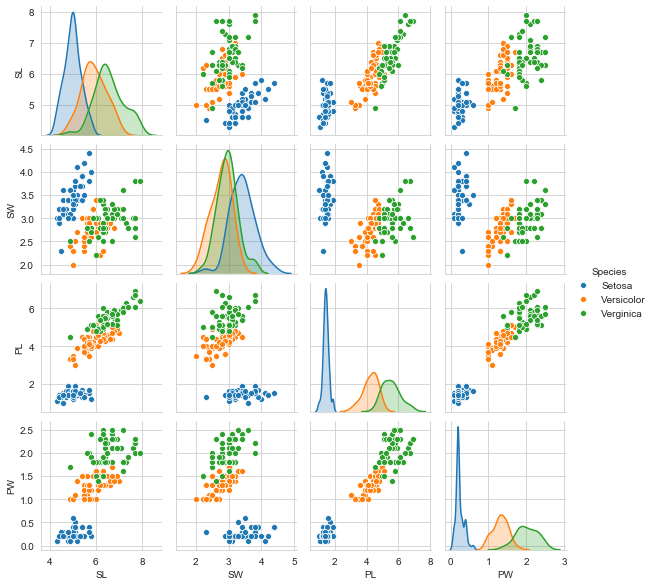

In [31]:
sns.pairplot(iris,hue='Species', height=2)

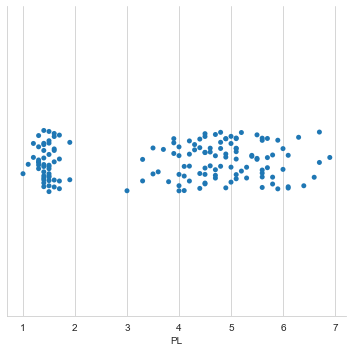

In [40]:
sns.catplot('PL', data=iris, hue_order='Species', height=5)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [45]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
from sklearn import metrics

In [47]:
Y_pred = logreg.predict(X_test)

In [51]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [60]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [61]:
Y_pred = knn.predict(X_test)

In [62]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [66]:
k_range = (1,21)
accuracy = []

In [67]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

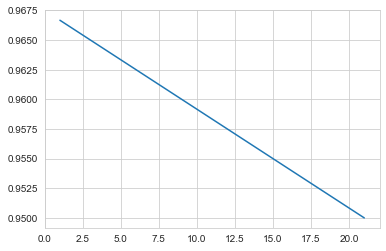

In [69]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')